In [20]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import os, os.path

from classy import Class

In [15]:
l_min = 90
l_max = 2000

In [76]:
directory = os.getcwd()
fileName = os.path.join(directory,'planck/planck_tt_spectrum_2018.txt')
l_data, Dl_data, _, _ = np.loadtxt(fileName, unpack = True)
Dl_data = Dl_data[l_min-2:l_max-1]

l_data = l_data[l_min-2:l_max-1]

print(min(l_data), l_min) 
print(max(l_data), l_max)

90.0 90
2000.0 2000


In [43]:
#function for ignoring comments in ini files
def ignore_comment(line):
    if '#' in line:
        #save all elements up to the #
        line = line[:line.find('#')]
    if '*' in line:
        line = ''

    return line


##This is from AxiCLASS
def is_number(s):
# ---------------------------------- This func checks whether a thing is a number. Found online
    try:
        float(s)
    except ValueError:
        pass

    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass

    return False

def read_ini_file(inifile, loc = ''):
# Function to read ini file and save it in a dictionary that can be passed to classy
# Takes the required argument inifile = filename with extension
# Takes the optional argument loc = location of your ini file, ending in a '/'
# Returns dictionary of everything contained in your ini file
#
    inivals = {}

    with open(loc + inifile) as f: # opening initialisation file as f
        content = f.readlines() # reading the initialisation file and turning it into a list

    q = {} # initialise q as an empty dictionary
    for s in content: # iterates over lines in .ini file and saves information, turning numbers into floats from strings
        #SV --- added this skip over commented sections
        s = ignore_comment(s)
        if s != '':
            if is_number(s[s.find('=')+2:]):
                q[s[:s.find(' =')]] = float(s[s.find('=')+2:])
            else:
                q[s[:s.find(' =')]] = s[s.find('=')+2:-1]

    q.pop('')
    return q # inivals dict has dict of initial values at key given by 'original'

In [67]:
def get_power(params, l_min, l_max):
        
    #CLASS gives results in natural units
    #convert to muK^2 to match data
    T_cmb = 2.7255e6 #temp in microkelvins

    #create an instance of CLASS wrapper w/correct params
    cosmo = Class()
    cosmo.set(params)
    #cosmo.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
    
    cosmo.compute()
    
    #lensed cl until l=l_max
    output = cosmo.raw_cl(l_max)#cosmo.lensed_cl(l_max)
    ls = output['ell'][l_min:]
    Cls = output['tt'][l_min:]*T_cmb**2
    

    Dls = ls*(ls+1)*Cls/(2*np.pi)
    
    #clean ups
    cosmo.struct_cleanup()
    cosmo.empty()
    
    return ls, Cls, Dls

In [68]:
model_pars = read_ini_file('example_axiCLASS.ini', loc='/Users/saravannah/Axion-MCMC/axion_MCMC/')
model_pars['n_axion'] = 3

l_model, Cl_model, Dl_model = get_power(model_pars, l_min, l_max)


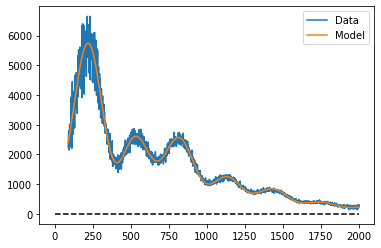

In [72]:
plt.plot(l_model, Dl_data, label='Data' )
plt.plot(l_model, Dl_model, label='Model')

plt.legend()
plt.hlines(0,0,2000, colors='Black', linestyle='dashed')